# Import library

# Q1

In [116]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.linear_model import LogisticRegression
import string
import warnings
warnings.filterwarnings('ignore')
import scipy.cluster.hierarchy as shc

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

from sklearn import metrics

In [66]:
# Load data
data = pd.read_csv('cereals.CSV')
data.head()

,Name,Manuf,Type,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,...,Weight,Cups,Rating,Cold,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,...,1.0,0.33,68.402973,1,1,0,0,0,0,0
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,...,1.0,1.00,33.983679,1,0,1,0,0,0,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,...,1.0,0.33,59.425505,1,0,0,1,0,0,0
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,...,1.0,0.50,93.704912,1,0,0,1,0,0,0
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,...,1.0,0.75,34.384843,1,0,0,0,0,1,0


## a) Explore and summarize the data as follows

### ii) compute mean, median, min, max and std

In [3]:
help_list = ['Calories','Protein','Fat','Sodium','Fiber','Carbo','Sugars','Potass','Vitamins','Weight','Cups','Rating']
temp = {'mean':data[help_list].mean(), 'median':data[help_list].median(),'min':data[help_list].min(),'max':data[help_list].max(),'standard deviation':data[help_list].std()}
result = pd.DataFrame(data=temp)
result

,mean,median,min,max,standard deviation
Calories,106.883117,110.000000,50.000000,160.000000,19.484119
Protein,2.545455,3.000000,1.000000,6.000000,1.094790
Fat,1.012987,1.000000,0.000000,5.000000,1.006473
Sodium,159.675325,180.000000,0.000000,320.000000,83.832295
Fiber,2.151948,2.000000,0.000000,14.000000,2.383364
Carbo,14.802632,14.500000,5.000000,23.000000,3.907326
Sugars,7.026316,7.000000,0.000000,15.000000,4.378656
Potass,98.666667,90.000000,15.000000,330.000000,70.410636
Vitamins,28.246753,25.000000,0.000000,100.000000,22.342523
Weight,1.029610,1.000000,0.500000,1.500000,0.150477


### compute correlation table

In [4]:
matrix = data[help_list].corr()
matrix

,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vitamins,Weight,Cups,Rating
Calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.257638,0.566533,-0.072063,0.265356,0.696091,0.087200,-0.689376
Protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.025012,-0.291853,0.563706,0.007335,0.216158,-0.244469,0.470618
Fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.300003,0.302497,0.200445,-0.031156,0.214625,-0.175892,-0.409284
Sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.297687,0.058866,-0.042632,0.361477,0.308576,0.119665,-0.401295
Fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.380357,-0.138760,0.911528,-0.032243,0.247226,-0.513061,0.584160
Carbo,0.257638,-0.025012,-0.300003,0.297687,-0.380357,1.000000,-0.471184,-0.365003,0.219202,0.138467,0.367460,0.088712
Sugars,0.566533,-0.291853,0.302497,0.058866,-0.138760,-0.471184,1.000000,0.001414,0.098231,0.455844,-0.048961,-0.763902
Potass,-0.072063,0.563706,0.200445,-0.042632,0.911528,-0.365003,0.001414,1.000000,-0.005427,0.419933,-0.501607,0.416009
Vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.219202,0.098231,-0.005427,1.000000,0.320324,0.128405,-0.240544
Weight,0.696091,0.216158,0.214625,0.308576,0.247226,0.138467,0.455844,0.419933,0.320324,1.000000,-0.199583,-0.298124


### compute correlalation plot

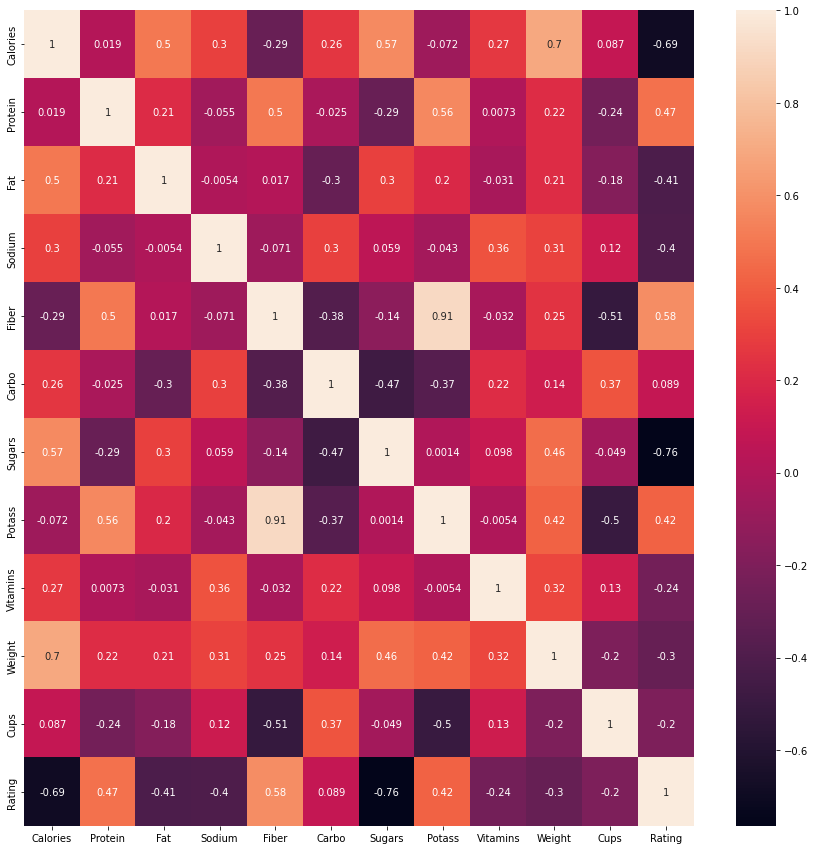

In [5]:
fig, axs = plt.subplots(nrows=1, figsize=(15, 15))
corr_plot = matrix.round(2)
sns.heatmap(matrix, annot=True)
plt.show()

### iii) plot the histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f451d6a9460>,
      dtype=object)

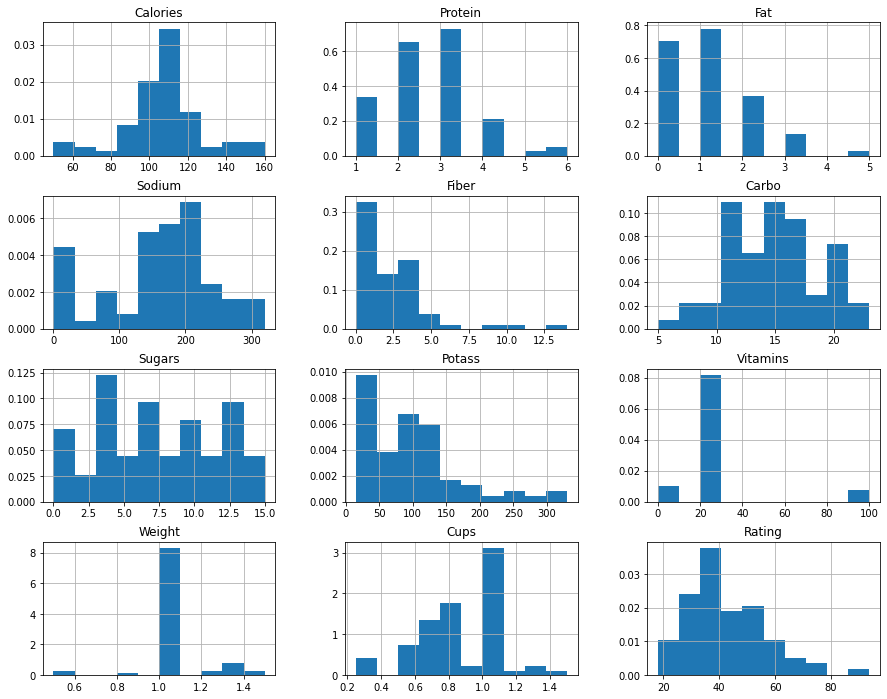

In [6]:
matplotlib.rcParams['figure.figsize'] = (15,12)
data[help_list].hist(bins=10,density=True)

### iv) plot the boxplot

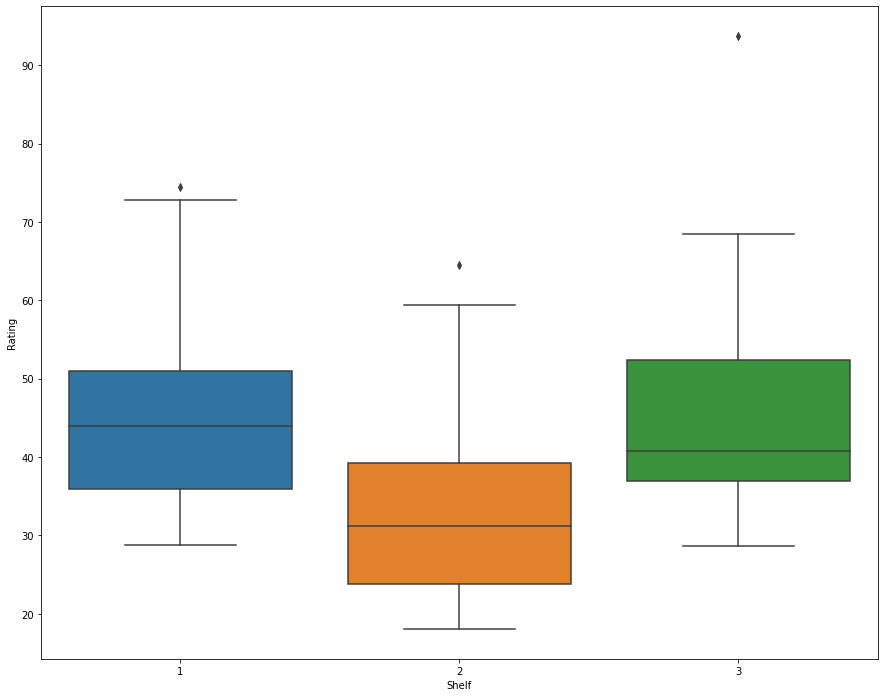

In [7]:
sns.boxplot(data = data, x = data['Shelf'], y = data['Rating'])
plt.show()

## b) Apply hierarchical clustering to the data using Euclidean distance with normalized measurements

In [67]:
# Data cleaning
data.dropna(inplace=True)
lable_name = data['Name'].tolist()
data = data.drop(['Name'],axis=1)
data = data.drop(['Manuf'],axis=1)
data = data.drop(['Type'],axis=1)

data = preprocessing.normalize(data)

### i) Compare the dendrograms from single linkage and complete linkage methods

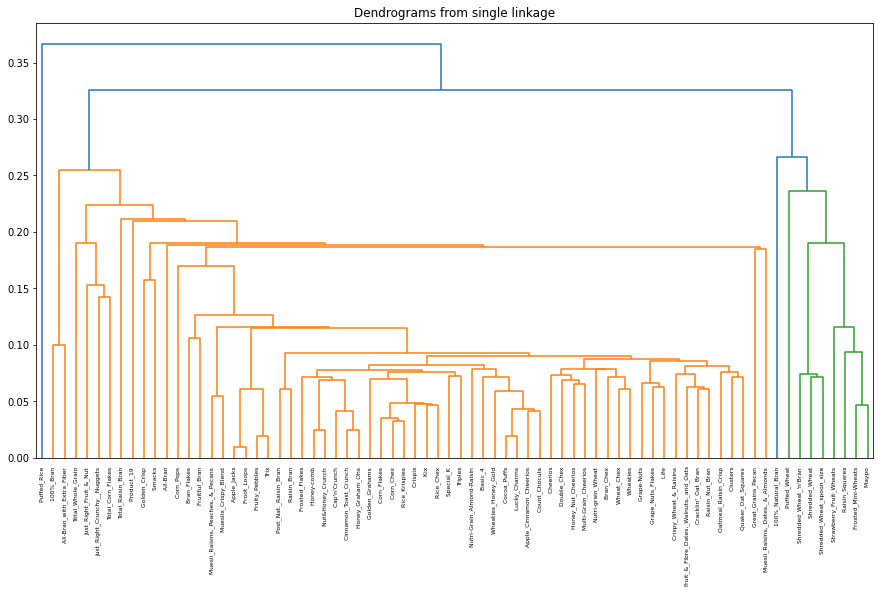

In [68]:
# Single linkage
fig, axs = plt.subplots(nrows=1, figsize=(15, 8))
dendrogram = shc.dendrogram(shc.linkage(data, method='single', metric='euclidean'),labels = lable_name)
plt.title("Dendrograms from single linkage")
plt.show()

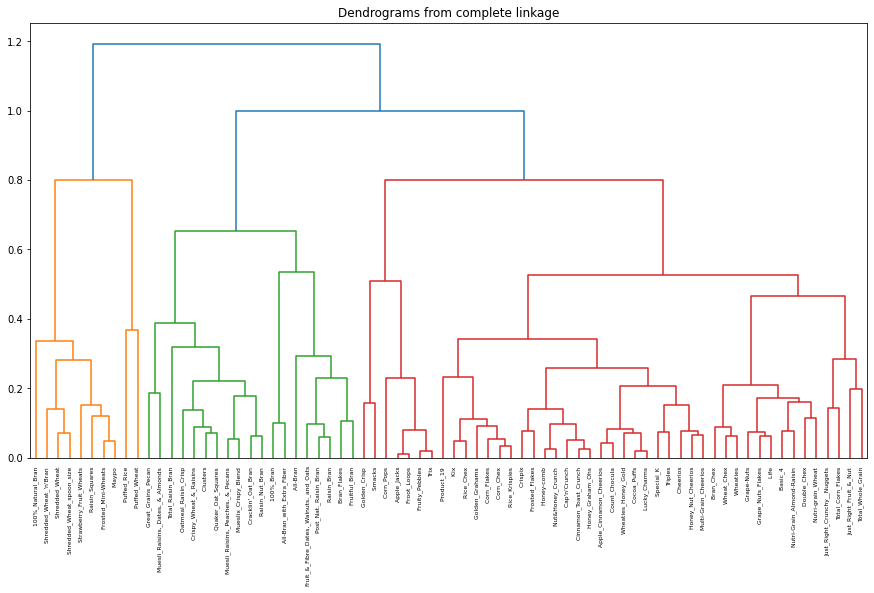

In [69]:
# Complete linkage
fig, axs = plt.subplots(nrows=1, figsize=(15, 8))
dendrogram = shc.dendrogram(shc.linkage(data, method='complete', metric='euclidean'),labels = lable_name)
plt.title("Dendrograms from complete linkage")
plt.show()

In [70]:
center_complete = shc.fcluster(shc.linkage(data, method='complete', metric='euclidean'),0.85, criterion='distance')
temp_complete = pd.DataFrame(data).groupby(center_complete).mean()
temp_complete

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1,0.588019,0.017012,0.003364,0.018502,0.013489,0.103882,0.018120,0.618243,0.065938,0.016223,0.006041,0.006474,0.441386,0.006640,0.002534,0.002821,0.001285,0.000000,0.000000,0.00066
2,0.417845,0.011873,0.006084,0.567928,0.015435,0.045836,0.031459,0.644502,0.103392,0.010886,0.004102,0.002263,0.159885,0.003680,0.000162,0.000252,0.000982,0.001087,0.000401,0.00000
3,0.466109,0.009073,0.003580,0.788696,0.004659,0.064914,0.034486,0.249801,0.137329,0.008244,0.004344,0.003807,0.157640,0.004267,0.000000,0.000279,0.001473,0.001492,0.000413,0.00000


In [71]:
center_single = shc.fcluster(shc.linkage(data, method='single', metric='euclidean'),0.3,criterion='distance')
temp_single = pd.DataFrame(data).groupby(center_single).mean()
temp_single

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1,0.451781,0.009904,0.004323,0.723155,0.007858,0.059250,0.033588,0.366977,0.127254,0.009029,0.004272,0.003348,0.158307,0.004092,0.000048,0.000271,0.001328,0.001372,0.00041,0.000000
2,0.584963,0.017534,0.003738,0.020558,0.014988,0.097642,0.020134,0.666419,0.073264,0.013922,0.006028,0.005825,0.407325,0.006010,0.002816,0.001767,0.001428,0.000000,0.00000,0.000733
3,0.615525,0.012310,0.000000,0.000000,0.000000,0.160036,0.000000,0.184657,0.000000,0.036931,0.006155,0.012310,0.747938,0.012310,0.000000,0.012310,0.000000,0.000000,0.00000,0.000000


### c) Apply k-means clustering using all variables except name and rating, and with k=5

In [75]:
# Load data
data = pd.read_csv('cereals.CSV')
data.head()

data.dropna(inplace=True)
lable_name = data['Name'].tolist()
data = data.drop(['Name'],axis=1)
data = data.drop(['Manuf'],axis=1)
data = data.drop(['Type'],axis=1)

# Drop rating
from sklearn.cluster import KMeans
knn = data.drop(['Rating'],axis=1)
knn.head()

,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vitamins,Shelf,Weight,Cups,Cold,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP
0,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,1,1,0,0,0,0,0
1,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,1,0,1,0,0,0,0
2,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,1,0,0,1,0,0,0
3,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,1,0,0,1,0,0,0
5,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,1,0,0,0,1,0,0


In [ ]:
# fit knn
kmeans = KMeans(n_clusters=5)
label = kmeans.fit_predict(knn)
print(label)

[1 4 0 0 2 0 2 0 0 4 2 2 2 2 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 4 2 0 0
 0 2 4 2 3 0 0 0 2 0 0 0 2 0 0 4 4 4 0 2 0 0 0 1 1 1 0 0 1 2 2 2 2 2 0 2 2]


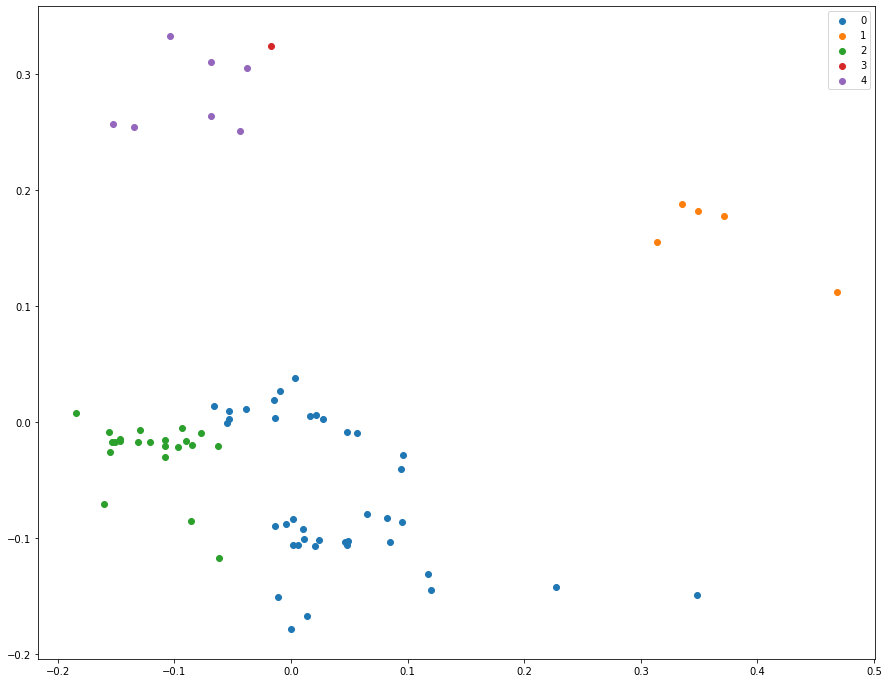

In [ ]:
from sklearn.decomposition import PCA
# Use pca to get x and y
pca = PCA(2)
df = pca.fit_transform(knn)
# Getting unique labels
u_labels = np.unique(label)

# Plot the result
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

# Q2

In [98]:
# Load data
churn = pd.read_csv('Churn.csv')
churn.head()

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,128,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,2.70,1,False
1,107,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,3.70,1,False
2,137,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,3.29,0,False
3,84,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,1.78,2,False
4,75,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,2.73,3,False


In [99]:
churn['Churn']

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Name: Churn, Length: 3333, dtype: bool

## d）

## ii）

In [100]:
# Data prepocessing
churn["Int'l Plan"]=churn["Int'l Plan"].apply(lambda x: 1 if x=='yes' else 0)
churn['VMail Plan']=churn['VMail Plan'].apply(lambda x: 1 if x=='yes' else 0)

In [101]:
churn.head()

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,128,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,2.70,1,False
1,107,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,3.70,1,False
2,137,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,3.29,0,False
3,84,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,1.78,2,False
4,75,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,2.73,3,False


In [109]:
Y = churn['Churn']
X = churn.drop('Churn', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [112]:
# Train the model
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

prediction = clf.predict(X)

# test the accuarcy:
print("Accuarcy:", clf.score(X_test,y_test))

Accuarcy: 0.896551724137931


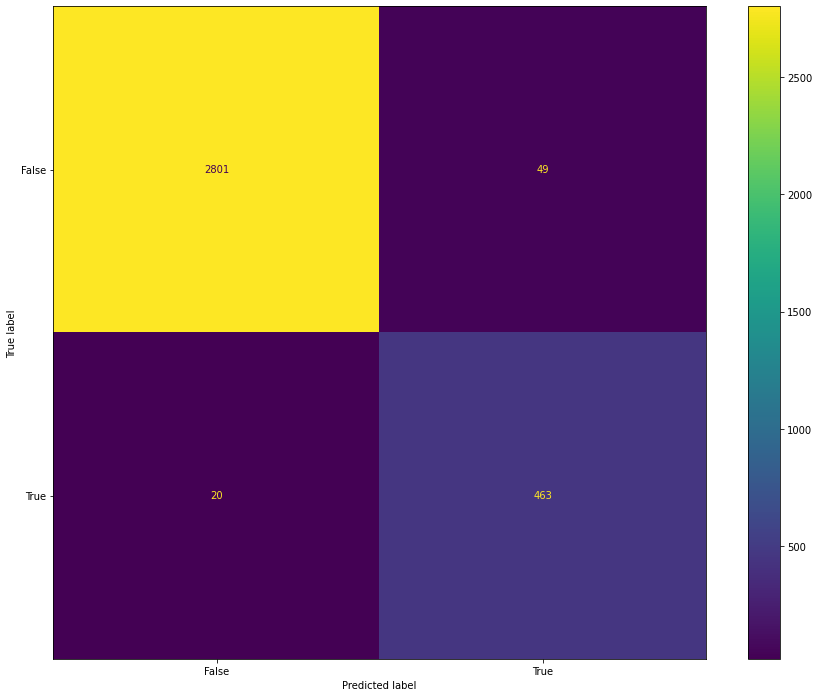

In [117]:
# Plot the confusion matrix
confusion_matrix = metrics.confusion_matrix(Y, prediction)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

### iii)

In [119]:
# Train the model
clf_cost = DecisionTreeClassifier(class_weight={True:2000,False:1200})
clf_cost.fit(X_train,y_train)
prediction_cost = clf_cost.predict(X)

# test the accuarcy:
print("Accuarcy:", clf.score(X_test,y_test))

Accuarcy: 0.896551724137931


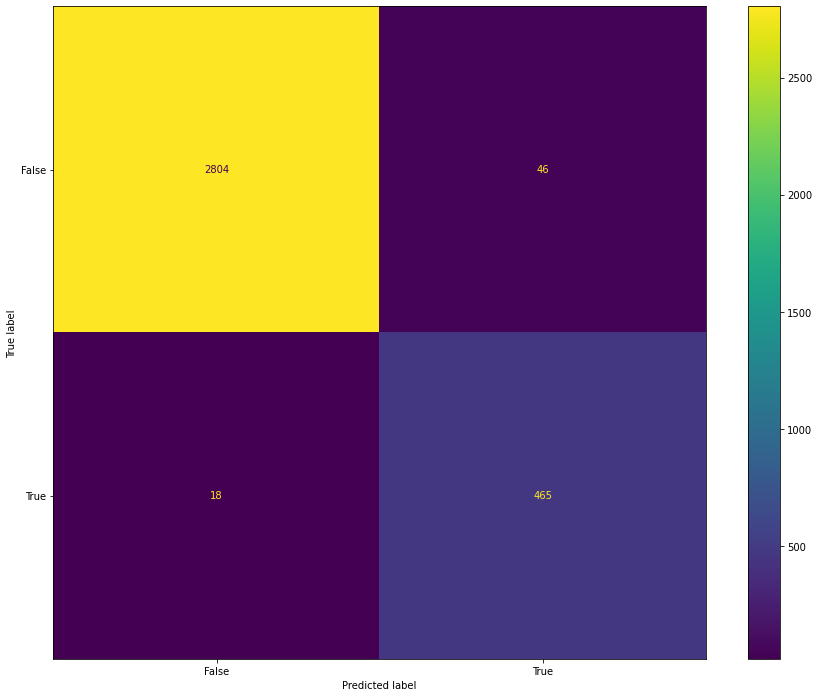

In [121]:
# Plot the confusion matrix
confusion_matrix = metrics.confusion_matrix(Y, prediction_cost)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# Q3

In [ ]:
# Load data
RidingMowers = pd.read_csv('RidingMowers.csv')
RidingMowers.head()

,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner


## a) Use all the data to fit a logistic regression of ownership on the two predictors.

In [ ]:
# transfer ownership to numerical value
Ownership = []

for idx in RidingMowers['Ownership']:
    if idx == 'Owner':
      Ownership.append(1)
    else:
      Ownership.append(0)

RidingMowers = RidingMowers.drop(['Ownership'],axis=1)
RidingMowers['Ownership'] = Ownership
RidingMowers.head()

,Income,Lot_Size,Ownership
0,60.0,18.4,1
1,85.5,16.8,1
2,64.8,21.6,1
3,61.5,20.8,1
4,87.0,23.6,1


In [ ]:
predictors = RidingMowers.drop(['Ownership'],axis=1)

In [ ]:
# fit the logistic regression model 
model = LogisticRegression()
model.fit(predictors, RidingMowers['Ownership'])

LogisticRegression()

In [ ]:
model.coef_

array([[0.10085007, 0.81168427]])

## b) Calculate percentage of households in the study own snow blowers

In [ ]:
# count owner and noowner
count_owner = 0 
count_noowner = 0
for idx in RidingMowers['Ownership']:
  if  idx == 1:
    count_owner += 1
  else:
    count_noowner += 1
percentage = (count_owner / (count_owner + count_noowner)) * 100
print('Percentage is', percentage, '%')

Percentage is 50.0 %


## c) Create a scatter plot of Income vs. Lot Size using color or symbol to distinguish owners from nonowners. 

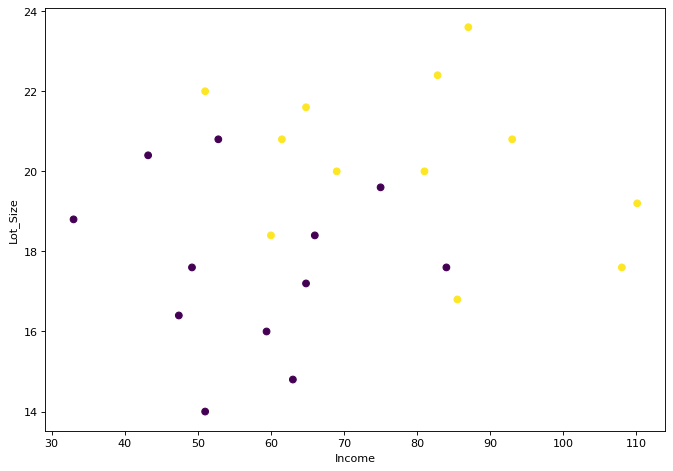

Yellow dots are owners, and violet dots are nonowers


In [ ]:
plt.figure(figsize=(10, 7), dpi=80)
plt.scatter(RidingMowers['Income'], RidingMowers['Lot_Size'], c=RidingMowers['Ownership'])
plt.xlabel("Income")
plt.ylabel("Lot_Size")
plt.show()
print('Yellow dots are owners, and violet dots are nonowers')

## d) Among nonowners, calculate the percentage of households classified correctly

In [ ]:
# predict the model 
prediction = model.predict(predictors)

nonowers = 0
right = 0
for i in range(len(RidingMowers['Ownership'])):
  if RidingMowers['Ownership'][i] == 0:
    nonowers += 1
    if prediction[i] == RidingMowers['Ownership'][i]:
      right += 1

answer = (right/nonowers)*100
print('Precentage is:',answer,'%')

Precentage is: 83.33333333333334 %


### f)The odds that a household with a $60K income and a lot size of 20,000 ft-sq is an owner when using cutoff = 0.5

In [ ]:
odds = model.predict_proba([[60,20]])
odds

array([[0.51073169, 0.48926831]])

### g)The minimum income that a household a with 16,000 ft-sq lot size should have before it is classified as an owner

In [ ]:
# fit the model again
model = LogisticRegression()
model.fit(predictors, RidingMowers['Ownership'])

min_income = 0
lot = 16
while True:
  min_income +=0.01
  if model.predict([[min_income,16]])[0] == 1:
    print(min_income)
    break

92.62000000001048
